# 索引

In [1]:
import numpy as np
import pandas as pd

### 一、索引器

###### 对于dataframe而言，创建表的时候列名应该就是列索引了，而行索引需要设置

#### 1. 表的列索引

#### 2. 序列的行索引

#### 3. loc索引器

##### 对于表而言，有两种索引器，一种是基于 元素 的 loc 索引器，另一种是基于 位置 的 iloc 索引器

###### loc 索引器的一般形式是 loc[*, *]，有以下几种格式
###### * 为单个元素
###### * 为元素列表
###### * 为切片
###### * 为布尔列表:df_demo.loc[df_demo.Weight>70].head()
###### * 为函数，如果判断条件过多，可以写成函数的形式

### **<font color = red>不要使用链式赋值！！！困扰多年的问题</font>**
#### <font color = red>在对表或者序列赋值时，应当在使用一层索引器后直接进行赋值操作，这样做是由于进行多次索引后赋值是赋在临时返回的 copy 副本上的，而没有真正修改元素从而报出 SettingWithCopyWarning 警告。</font>
##### df_chain[df_chain.A!=0].B = 1，进行了多层索引，只对copy的副本进行修改，没有真正改变原始的df
##### df_chain.loc[df_chain.A!=0,'B'] = 1，真正改变原始的df

#### 4. iloc索引器

###### iloc 索引器的一般形式是 iloc[*, *]，有以下几种格式
###### * 为单个元素
###### * 为元素列表
###### * 为切片
###### * 为布尔列表:df_demo.iloc[df_demo.Weight>70].head()
###### * 为函数，如果判断条件过多，可以写成函数的形式

####  **<font color = red>5. query方法</font>**

##### 在 pandas 中，支持把字符串形式的查询表达式传入 query 方法来查询数据，其表达式的执行结果必须返回布尔列表。在进行复杂索引时，由于这种检索方式无需像普通方法一样重复使用 DataFrame 的名字来引用列名

df.query('((School == "Fudan University")&'
         ' (Grade == "Senior")&'
         ' (Weight > 70))|'
         '((School == "Peking University")&'
         ' (Grade != "Senior")&'
         ' (Weight > 80))')
df.query('Weight > Weight.mean()').head()

#####  **<font color = red>在字符串中出现与列表的比较时， == 和 != 分别表示元素出现在列表和没有出现在列表，等价于 in 和 not in</font>**

#####  **<font color = red>对于 query 中的字符串，如果要引用外部变量，只需在变量名前加 @ 符号</font>**
##### low, high =70, 80
##### df.query('(Weight >= @low) & (Weight <= @high)').head()

#### 6. 随机抽样,sample函数

### 二、多级索引

#### 1. 多级索引及其表的结构

In [2]:
df = pd.read_csv('data/learn_pandas.csv',usecols = ['School', 'Grade', 'Name', 'Gender','Weight', 'Transfer'])

In [3]:
np.random.seed(0)
multi_index = pd.MultiIndex.from_product([list('ABCD'),
              df.Gender.unique()], names=('School', 'Gender'))
multi_column = pd.MultiIndex.from_product([['Height', 'Weight'],
               df.Grade.unique()], names=('Indicator', 'Grade'))
df_multi = pd.DataFrame(np.c_[(np.random.randn(8,4)*5 + 163).tolist(),
                              (np.random.randn(8,4)*5 + 65).tolist()],
                        index = multi_index,
                        columns = multi_column).round(1)
df_multi

Indicator       Height                           Weight                   \
Grade         Freshman Senior Sophomore Junior Freshman Senior Sophomore   
School Gender                                                              
A      Female    171.8  165.0     167.9  174.2     60.6   55.1      63.3   
       Male      172.3  158.1     167.8  162.2     71.2   71.0      63.1   
B      Female    162.5  165.1     163.7  170.3     59.8   57.9      56.5   
       Male      166.8  163.6     165.2  164.7     62.5   62.8      58.7   
C      Female    170.5  162.0     164.6  158.7     56.9   63.9      60.5   
       Male      150.2  166.3     167.3  159.3     62.4   59.1      64.9   
D      Female    174.3  155.7     163.2  162.1     65.3   66.5      61.8   
       Male      170.7  170.3     163.8  164.9     61.6   63.2      60.9   

Indicator             
Grade         Junior  
School Gender         
A      Female   65.8  
       Male     63.5  
B      Female   74.8  
       Male     68.9  
C      Female   66.9  
       Male     67.1  
D      Female   63.2  
       Male     56.4

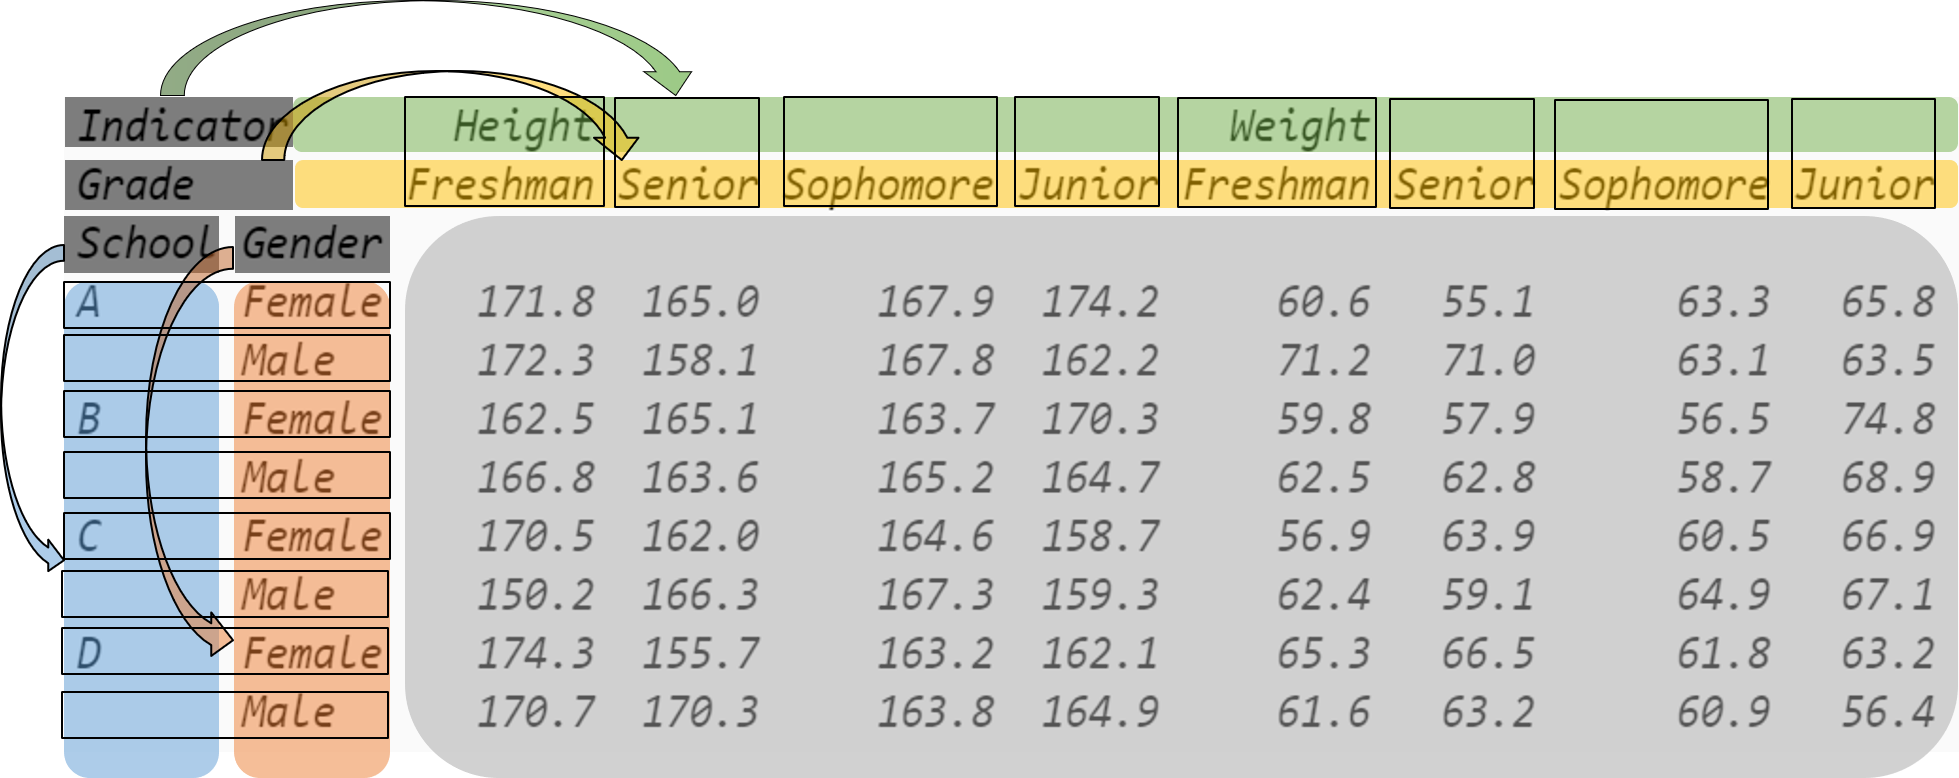

In [4]:
# 索引的名字和值属性分别可以通过 names 和 values 获得
print(df_multi.index.names)
print(df_multi.columns.names)

print(df_multi.index.values)
print(df_multi.columns.values)

['School', 'Gender']
['Indicator', 'Grade']
[('A', 'Female') ('A', 'Male') ('B', 'Female') ('B', 'Male')
 ('C', 'Female') ('C', 'Male') ('D', 'Female') ('D', 'Male')]
[('Height', 'Freshman') ('Height', 'Senior') ('Height', 'Sophomore')
 ('Height', 'Junior') ('Weight', 'Freshman') ('Weight', 'Senior')
 ('Weight', 'Sophomore') ('Weight', 'Junior')]


#### 2. 多级索引中的loc索引器

##### 当传入元组列表或单个元组或返回前二者的函数时，需要先进行索引排序以避免性能警告

#### 3. IndexSlice对象
##### 仅能处理索引不重复的表
##### Slice 对象一共有两种形式，第一种为 loc[idx[*,*]] 型，第二种为 loc[idx[*,*],idx[*,*]] 型

#### 4. 多级索引的构造

##### set_index
##### pd.MultiIndex.from_tuples      基于元组
##### pd.MultiIndex.from_arrays      基于列表
##### pd.MultiIndex.from_product   基于笛卡尔积，根据给定多个列表的笛卡尔积进行构造

### 三、索引的常用方法

In [5]:
np.random.seed(0)
L1,L2,L3 = ['A','B'],['a','b'],['alpha','beta']
mul_index1 = pd.MultiIndex.from_product([L1,L2,L3],
             names=('Upper', 'Lower','Extra'))
L4,L5,L6 = ['C','D'],['c','d'],['cat','dog']
mul_index2 = pd.MultiIndex.from_product([L4,L5,L6],
             names=('Big', 'Small', 'Other'))
df_ex = pd.DataFrame(np.random.randint(-9,10,(8,8)),
                        index=mul_index1,
                        columns=mul_index2)

#### 1. 索引层的交换和删除

##### swaplevel ：只能交换两个层

In [6]:
df_ex.swaplevel(0,2,axis=1).head()

Other             cat dog cat dog cat dog cat dog
Small               c   c   d   d   c   c   d   d
Big                 C   C   C   C   D   D   D   D
Upper Lower Extra                                
A     a     alpha   3   6  -9  -6  -6  -2   0   9
            beta   -5  -3   3  -8  -3  -2   5   8
      b     alpha  -4   4  -1   0   7  -4   6   6
            beta   -9   9  -6   8   5  -2  -9  -8
B     a     alpha   0  -9   1  -6   2   9  -7  -9

##### reorder_levels：可以交换任意层

In [7]:
df_ex.reorder_levels([2,0,1],axis=0).head() # 列表数字指代原来索引中的层

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Extra Upper Lower                                
alpha A     a       3   6  -9  -6  -6  -2   0   9
beta  A     a      -5  -3   3  -8  -3  -2   5   8
alpha A     b      -4   4  -1   0   7  -4   6   6
beta  A     b      -9   9  -6   8   5  -2  -9  -8
alpha B     a       0  -9   1  -6   2   9  -7  -9

##### droplevel：删除某一层的索引 

In [8]:
df_ex.droplevel(1,axis=1)

Big                 C               D            
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     alpha   3   6  -9  -6  -6  -2   0   9
            beta   -5  -3   3  -8  -3  -2   5   8
      b     alpha  -4   4  -1   0   7  -4   6   6
            beta   -9   9  -6   8   5  -2  -9  -8
B     a     alpha   0  -9   1  -6   2   9  -7  -9
            beta   -9  -5  -4  -3  -1   8   6  -5
      b     alpha   0   1  -8  -8  -2   0  -6  -3
            beta    2   5   9  -9   5  -6   3   1

In [9]:
df_ex.droplevel([0,1],axis=0)

Big     C               D            
Small   c       d       c       d    
Other cat dog cat dog cat dog cat dog
Extra                                
alpha   3   6  -9  -6  -6  -2   0   9
beta   -5  -3   3  -8  -3  -2   5   8
alpha  -4   4  -1   0   7  -4   6   6
beta   -9   9  -6   8   5  -2  -9  -8
alpha   0  -9   1  -6   2   9  -7  -9
beta   -9  -5  -4  -3  -1   8   6  -5
alpha   0   1  -8  -8  -2   0  -6  -3
beta    2   5   9  -9   5  -6   3   1

#### 2. 索引属性的修改

##### 通过 rename_axis 可以对索引层的名字进行修改，常用的修改方式是传入字典的映射
##### 这里只改变了索引的名称，不是改变索引的值

In [10]:
df_ex.rename_axis(index={'Upper':'Changed_row'},
                  columns={'Other':'Changed_Col'}).head()

Big                       C               D            
Small                     c       d       c       d    
Changed_Col             cat dog cat dog cat dog cat dog
Changed_row Lower Extra                                
A           a     alpha   3   6  -9  -6  -6  -2   0   9
                  beta   -5  -3   3  -8  -3  -2   5   8
            b     alpha  -4   4  -1   0   7  -4   6   6
                  beta   -9   9  -6   8   5  -2  -9  -8
B           a     alpha   0  -9   1  -6   2   9  -7  -9

##### 通过 rename 可以对索引的值进行修改，如果是多级索引需要指定修改的层号 level 
##### 这里才是改变索引的值

In [11]:
df_ex.rename(columns={'cat':'not_cat'},
             level=2).head()

Big                     C                       D                
Small                   c           d           c           d    
Other             not_cat dog not_cat dog not_cat dog not_cat dog
Upper Lower Extra                                                
A     a     alpha       3   6      -9  -6      -6  -2       0   9
            beta       -5  -3       3  -8      -3  -2       5   8
      b     alpha      -4   4      -1   0       7  -4       6   6
            beta       -9   9      -6   8       5  -2      -9  -8
B     a     alpha       0  -9       1  -6       2   9      -7  -9

##### 传入参数也可以是函数，其输入值就是索引元素

##### index具有map函数

In [12]:
df_temp = df_ex.copy()
new_idx =df_temp.index.map(lambda x: (x[0],
                                       x[1],
                                       str.upper(x[2])))
df_temp.index = new_idx
df_temp.head()

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     ALPHA   3   6  -9  -6  -6  -2   0   9
            BETA   -5  -3   3  -8  -3  -2   5   8
      b     ALPHA  -4   4  -1   0   7  -4   6   6
            BETA   -9   9  -6   8   5  -2  -9  -8
B     a     ALPHA   0  -9   1  -6   2   9  -7  -9

In [13]:
df_temp = df_ex.copy()
new_idx = df_temp.index.map(lambda x: (x[0]+'-'+
                                       x[1]+'-'+
                                       x[2]))
df_temp.index = new_idx
df_temp.head()

Big         C               D            
Small       c       d       c       d    
Other     cat dog cat dog cat dog cat dog
A-a-alpha   3   6  -9  -6  -6  -2   0   9
A-a-beta   -5  -3   3  -8  -3  -2   5   8
A-b-alpha  -4   4  -1   0   7  -4   6   6
A-b-beta   -9   9  -6   8   5  -2  -9  -8
B-a-alpha   0  -9   1  -6   2   9  -7  -9

#### 3. 索引的设置与重置

##### 3.1 设置
##### set_index : df.set_index(col, append=True) 
##### append ，表示是否来保留原来的索引，True直接把新设定的添加到原索引的内层
##### 如果想要添加索引的列没有出现在其中，那么可以直接在参数中传入相应的 Series 

##### 3.2 删除
##### reset_index : df.reset_index(col, drop=True)
##### 是 set_index 的逆函数，其主要参数是 drop ，表示是否要把去掉的索引层丢弃，而不是添加到列中

#### 4. 索引的变形

### 四、索引运算

#### 1. 集合的运算法则，注意只有set可以进行这些操作，其他如series需要先转set

\begin{split}\rm
S_A.intersection(S_B) &= \rm S_A \cap S_B \Leftrightarrow \rm \{x|x\in S_A\, and\, x\in S_B\}\\
\rm
S_A.union(S_B) &= \rm S_A \cup S_B \Leftrightarrow \rm \{x|x\in S_A\, or\, x\in S_B\}\\
\rm
S_A.difference(S_B) &= \rm S_A - S_B \Leftrightarrow \rm \{x|x\in S_A\, and\, x\notin S_B\}\\
\rm
S_A.symmetric\_difference(S_B) &= \rm S_A\triangle S_B\Leftrightarrow \rm \{x|x\in S_A\cup S_B - S_A\cap S_B\}\end{split}

#### 2. 一般的索引运算

In [14]:
df_set_1 = pd.DataFrame([[0,1],[1,2],[3,4]],
                        index = pd.Index(['a','b','a'],name='id1'))

df_set_2 = pd.DataFrame([[4,5],[2,6],[7,1]],
                        index = pd.Index(['b','b','c'],name='id2'))

id1, id2 = df_set_1.index.unique(), df_set_2.index.unique()

df_set_1.loc[id1.intersection(id2)]


,0,1
b,1,2


##### isin 函数

In [15]:
# df1.col1.isin(df2.col2)

In [16]:
df_set_in_col_1 = df_set_1.reset_index()
df_set_in_col_2 = df_set_2.reset_index()

In [17]:
set(df_set_in_col_1.id1).union(set(df_set_in_col_2.id2))

{'a', 'b', 'c'}

### 五、练习

#### Ex1：公司员工数据集

In [18]:
df = pd.read_csv('data/company.csv')
df.head(3)

,EmployeeID,birthdate_key,age,city_name,department,job_title,gender
0,1318,1/3/1954,61,Vancouver,Executive,CEO,M
1,1319,1/3/1957,58,Vancouver,Executive,VP Stores,F
2,1320,1/2/1955,60,Vancouver,Executive,Legal Counsel,F


##### 1. 分别只使用 query 和 loc 选出年龄不超过四十岁且工作部门为 Dairy 或 Bakery 的男性。

In [19]:
df.query('(age<=40) & (department == ["Dairy","Bakery"]) & (gender == "M")').head(3)

,EmployeeID,birthdate_key,age,city_name,department,job_title,gender
3611,5791,1/14/1975,40,Kelowna,Dairy,Dairy Person,M
3613,5793,1/22/1975,40,Richmond,Bakery,Baker,M
3615,5795,1/30/1975,40,Nanaimo,Dairy,Dairy Person,M


In [20]:
df.loc[(df.age <= 40) & ((df.department == "Dairy") | (df.department == "Bakery")) & (df.gender == "M"),:].head(3)

,EmployeeID,birthdate_key,age,city_name,department,job_title,gender
3611,5791,1/14/1975,40,Kelowna,Dairy,Dairy Person,M
3613,5793,1/22/1975,40,Richmond,Bakery,Baker,M
3615,5795,1/30/1975,40,Nanaimo,Dairy,Dairy Person,M


In [21]:
# isin 方法
df.loc[(df.age<=40)&df.department.isin(["Dairy","Bakery"])&(df.gender=='M')].head(3)

,EmployeeID,birthdate_key,age,city_name,department,job_title,gender
3611,5791,1/14/1975,40,Kelowna,Dairy,Dairy Person,M
3613,5793,1/22/1975,40,Richmond,Bakery,Baker,M
3615,5795,1/30/1975,40,Nanaimo,Dairy,Dairy Person,M


##### 2. 选出员工 ID 号 为奇数所在行的第1、第3和倒数第2列。

In [22]:
df.loc[df.EmployeeID%2 == 1].iloc[:,[0,2,-2]].head(3)

,EmployeeID,age,job_title
1,1319,58,VP Stores
3,1321,56,VP Human Resources
5,1323,53,"Exec Assistant, VP Stores"


##### 3. 按照以下步骤进行索引操作

##### 把后三列设为索引后交换内外两层

In [23]:
df_step1_1 = df.set_index(list(df.columns[-3:]))
df_step1_1.head()

EmployeeID birthdate_key  age  city_name
department job_title          gender                                          
Executive  CEO                M             1318      1/3/1954   61  Vancouver
           VP Stores          F             1319      1/3/1957   58  Vancouver
           Legal Counsel      F             1320      1/2/1955   60  Vancouver
           VP Human Resources M             1321      1/2/1959   56  Vancouver
           VP Finance         M             1322      1/9/1958   57  Vancouver

In [24]:
df_step1_2 = df_step1_1.swaplevel(0,2,axis = 0)
df_step1_2.head()

EmployeeID birthdate_key  age  city_name
gender job_title          department                                          
M      CEO                Executive         1318      1/3/1954   61  Vancouver
F      VP Stores          Executive         1319      1/3/1957   58  Vancouver
       Legal Counsel      Executive         1320      1/2/1955   60  Vancouver
M      VP Human Resources Executive         1321      1/2/1959   56  Vancouver
       VP Finance         Executive         1322      1/9/1958   57  Vancouver

##### 恢复中间层索引

In [25]:
df_step2 = df_step1_2.reset_index(level=1)
df_step2.head()

job_title  EmployeeID birthdate_key  age  \
gender department                                                      
M      Executive                  CEO        1318      1/3/1954   61   
F      Executive            VP Stores        1319      1/3/1957   58   
       Executive        Legal Counsel        1320      1/2/1955   60   
M      Executive   VP Human Resources        1321      1/2/1959   56   
       Executive           VP Finance        1322      1/9/1958   57   

                   city_name  
gender department             
M      Executive   Vancouver  
F      Executive   Vancouver  
       Executive   Vancouver  
M      Executive   Vancouver  
       Executive   Vancouver

##### 修改外层索引名为 Gender

In [26]:
df_step3 = df_step2.reindex(df_step2.index.rename({'gender':'Gender'}))
df_step3.head()

job_title  EmployeeID birthdate_key  age  \
Gender department                                                      
M      Executive                  CEO        1318      1/3/1954   61   
F      Executive            VP Stores        1319      1/3/1957   58   
       Executive        Legal Counsel        1320      1/2/1955   60   
M      Executive   VP Human Resources        1321      1/2/1959   56   
       Executive           VP Finance        1322      1/9/1958   57   

                   city_name  
Gender department             
M      Executive   Vancouver  
F      Executive   Vancouver  
       Executive   Vancouver  
M      Executive   Vancouver  
       Executive   Vancouver

##### 用下划线合并两层行索引

In [27]:
df_step4 = df_step3.copy()
df_step4.index = df_step3.index.map(lambda x: x[0] + '_' + x[1])
df_step4.head()

,job_title,EmployeeID,birthdate_key,age,city_name
M_Executive,CEO,1318,1/3/1954,61,Vancouver
F_Executive,VP Stores,1319,1/3/1957,58,Vancouver
F_Executive,Legal Counsel,1320,1/2/1955,60,Vancouver
M_Executive,VP Human Resources,1321,1/2/1959,56,Vancouver
M_Executive,VP Finance,1322,1/9/1958,57,Vancouver


##### 把行索引拆分为原状态

In [28]:
df_step5 = df_step4.copy()
df_step5.index = df_step4.index.map(lambda x: (x.split('_')[0],x.split('_')[1]))
df_step5.head()

job_title  EmployeeID birthdate_key  age  city_name
M Executive                 CEO        1318      1/3/1954   61  Vancouver
F Executive           VP Stores        1319      1/3/1957   58  Vancouver
  Executive       Legal Counsel        1320      1/2/1955   60  Vancouver
M Executive  VP Human Resources        1321      1/2/1959   56  Vancouver
  Executive          VP Finance        1322      1/9/1958   57  Vancouver

##### 修改索引名为原表名称

In [29]:
df_step6 = df_step5.copy()
df_step6.index = df_step5.index.set_names(['gender','department'])
df_step6.head()

job_title  EmployeeID birthdate_key  age  \
gender department                                                      
M      Executive                  CEO        1318      1/3/1954   61   
F      Executive            VP Stores        1319      1/3/1957   58   
       Executive        Legal Counsel        1320      1/2/1955   60   
M      Executive   VP Human Resources        1321      1/2/1959   56   
       Executive           VP Finance        1322      1/9/1958   57   

                   city_name  
gender department             
M      Executive   Vancouver  
F      Executive   Vancouver  
       Executive   Vancouver  
M      Executive   Vancouver  
       Executive   Vancouver

##### 恢复默认索引并将列保持为原表的相对位置

In [30]:
df_step7 = df_step6.reset_index().reindex(df.columns, axis=1)

In [31]:
df_step7.equals(df)

True

#### Ex2：巧克力数据集

In [32]:
df = pd.read_csv('data/chocolate.csv')
df.head(3)

,Company,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating
0,A. Morin,2016,63%,France,3.75
1,A. Morin,2015,70%,France,2.75
2,A. Morin,2015,70%,France,3.00


##### 1. 把列索引名中的 \n 替换为空格。

In [33]:
df1 = df.rename(columns=lambda x : x.replace('\n',' '))
df1.head()

,Company,Review Date,Cocoa Percent,Company Location,Rating
0,A. Morin,2016,63%,France,3.75
1,A. Morin,2015,70%,France,2.75
2,A. Morin,2015,70%,France,3.00
3,A. Morin,2015,70%,France,3.50
4,A. Morin,2015,70%,France,3.50


##### 2. 巧克力 Rating 评分为1至5，每0.25分一档，请选出2.75分及以下且可可含量 Cocoa Percent 高于中位数的样本。

In [34]:
median_ = df['Cocoa\nPercent'].apply(lambda x: float(x.replace('%',''))*1.0/100).median()
df[(df.Rating <= 2.75) & (df['Cocoa\nPercent'].apply(lambda x: float(x.replace('%',''))*1.0/100) > median_)]

,Company,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating
33,Akesson's (Pralus),2010,75%,Switzerland,2.75
34,Akesson's (Pralus),2010,75%,Switzerland,2.75
36,Alain Ducasse,2014,75%,France,2.75
38,Alain Ducasse,2013,75%,France,2.50
39,Alain Ducasse,2013,75%,France,2.50
...,...,...,...,...,...
1736,Wilkie's Organic,2013,89%,Ireland,2.75
1738,Wilkie's Organic,2013,75%,Ireland,2.75
1741,Willie's Cacao,2013,100%,U.K.,2.25
1769,Zart Pralinen,2016,85%,Austria,2.75


##### 3. 将 Review Date 和 Company Location 设为索引后，选出 Review Date 在2012年之后且 Company Location 不属于 France, Canada, Amsterdam, Belgium 的样本。

In [35]:
idx = pd.IndexSlice
exclude = ['France', 'Canada', 'Amsterdam', 'Belgium']
res = df1.set_index(['Review Date', 'Company Location']).sort_index(level=0)
res.loc[idx[2012:,~res.index.get_level_values(1).isin(exclude)],:].head(3)

Company Cocoa Percent  Rating
Review Date Company Location                                   
2012        Australia         Bahen & Co.           70%     3.0
            Australia         Bahen & Co.           70%     2.5
            Australia         Bahen & Co.           70%     2.5

In [36]:
# 如果不现在设置索引会简单很多
df1[(df1['Review Date'] >= 2012) & (~df1['Company Location'].isin(['France', 'Canada', 'Amsterdam', 'Belgium']))].set_index(['Review Date', 'Company Location'])

Company Cocoa Percent  Rating
Review Date Company Location                                 
2015        U.S.A.               Acalli           70%    3.75
            U.S.A.               Acalli           70%    3.75
2017        Netherlands       Alexandre           70%    3.50
            Netherlands       Alexandre           70%    3.50
            Netherlands       Alexandre           70%    3.50
...                                 ...           ...     ...
2012        Austria              Zotter           75%    3.00
            Austria              Zotter           90%    3.25
            Austria              Zotter           70%    3.75
            Austria              Zotter           68%    3.25
            Austria              Zotter           58%    3.50

[972 rows x 3 columns]